In [2]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [35]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train[shuffle_index]  # for X, need iloc to locate the row

In [28]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
53308,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train[3000]

'9'

In [43]:
print(type(X_train))
print(type(y_train))
print(y_train.dtype)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
category


In [34]:
y_train[:15]

53308    1
2461     5
25414    1
24906    3
28826    3
54102    0
41548    5
23566    6
44685    4
40109    3
20425    4
42984    5
26515    8
32519    5
23390    1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [37]:
print(type(y_train[:15]))
# type：适用于所有Python对象，返回对象的类型名称。
# dtype：特定于NumPy数组和pandas对象，表示数组元素的具体数据类型。 fuck category

<class 'pandas.core.series.Series'>


In [44]:
y_train_5 = (y_train.astype(int) == 5)
y_test_5 = (y_test.astype(int) == 5)

In [46]:
y_train_5[:10]

53308    False
2461      True
25414    False
24906    False
28826    False
54102    False
41548     True
23566    False
44685    False
40109    False
Name: class, dtype: bool

In [47]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [56]:
print(type(X_train.iloc[3000,]))
print(X_train.iloc[3000,].dtype)
f = np.array(X_train.iloc[3000,])
print(f.shape)
sgd_clf.predict([f])  # so I need to 1) locate the row, 2) transform from series to array, 3) transform from array to 2D array

<class 'pandas.core.series.Series'>
int64
(784,)


array([False])

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')  # 3-fold

array([0.963  , 0.9598 , 0.95165])

In [62]:
# 选择分层K折模型
from sklearn.model_selection import StratifiedKFold
# 克隆模型方法
from sklearn.base import clone
 
# n_splits=3:将数据分三份 两份训练 一份测试
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
 
for train_index,test_index in skfolds.split(X_train,y_train_5):
    # 克隆clone_clf模型
    clone_clf = clone(sgd_clf)
    
    # 训练集验证集命名
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = (y_train_5[train_index])
    X_val_fold = X_train.iloc[test_index]
    y_val_fold = (y_train_5[test_index])
    
    # 训练模型
    clone_clf.fit(X_train_folds,y_train_folds)
    
    # 预测验证
    y_pred=clone_clf.predict(X_val_fold)
    # 预测正确的
    n_correct=sum(y_pred == y_val_fold)
    # 算出正确预测比率
    print(n_correct/len(y_pred))

0.89845
0.83755
0.86845


In [63]:
from sklearn.model_selection import cross_val_predict
 
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [65]:
from sklearn.metrics import confusion_matrix
 
confusion_matrix(y_train_5,y_train_pred)  # [[TP, FP], [FN, TN]] 记得主对角线为True就挺清晰

array([[53467,  1112],
       [ 1399,  4022]], dtype=int64)

In [67]:
from sklearn.metrics import precision_score,recall_score
 
# 精确度
print(precision_score(y_train_5,y_train_pred))
# 召回率
print(recall_score(y_train_5,y_train_pred))

0.7834047526295286
0.7419295332964397


In [68]:
from sklearn.metrics import f1_score
 
f1_score(y_train_5,y_train_pred)

0.7621032685930839

In [71]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
y_scores

array([ -160932.06655342,    59897.44006103,  -558022.89785108, ...,
          66044.39129223,  -265728.20459132, -1001519.02942127])

In [73]:
from sklearn.metrics import precision_recall_curve
 
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [74]:
thresholds.shape  # may be not equal to the trained data number

(60000,)

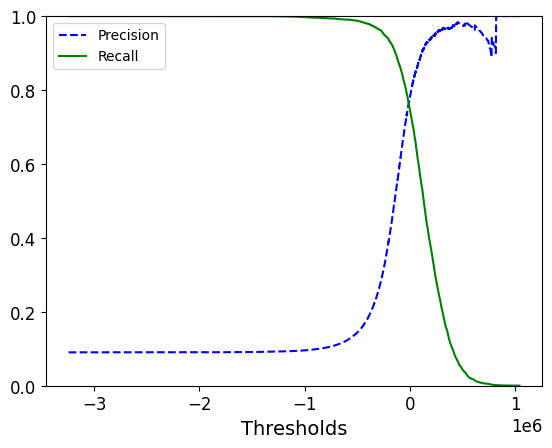

In [75]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.xlabel('Thresholds')
    # 给图加上图例
    plt.legend(loc='upper left')
    # 限制y坐标上下限
    plt.ylim([0,1])
 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

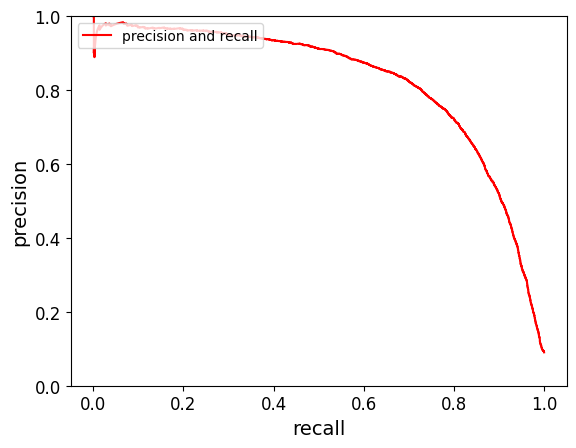

In [79]:
def plot_precision_recall(precisions,recalls):
    plt.plot(recalls[:-1],precisions[:-1],'r-',label='precision and recall')
    plt.ylabel('precision')
    plt.xlabel('recall')
    plt.legend(loc='upper left')
    plt.ylim([0,1])   
 
plot_precision_recall(precisions,recalls)
plt.show()

In [77]:
from sklearn.metrics import roc_curve
 
fpr,tpr,thesholds = roc_curve(y_train_5,y_scores)

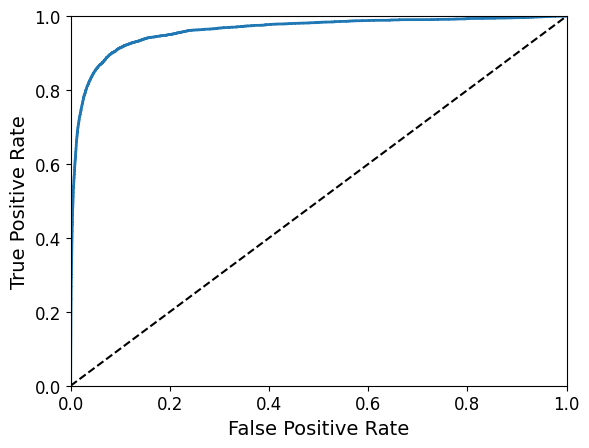

In [78]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    
    plt.plot([0,1],[0,1],'k--')
    
    # 对坐标值进行设置
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
 
plot_roc_curve(fpr,tpr)
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_train_5,y_scores)

0.9611239269242764